Check the DB1 explanaiton: https://ninapro.hevs.ch/instructions/DB1.html

In [ ]:
pip install h5py numpy scipy

: 

In [5]:
with open("S1_A1_E1.mat", "rb") as f:
    header = f.read(128)

print(header.decode(errors="ignore"))


MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jul 28 11:54:15 2014                                                  IM


In [7]:
from scipy.io import loadmat
data = loadmat("S1_A1_E1.mat")

for k in data.keys():
    if not k.startswith("__"):
        print(k, type(data[k]), getattr(data[k], "shape", None))

emg <class 'numpy.ndarray'> (101014, 10)
stimulus <class 'numpy.ndarray'> (101014, 1)
glove <class 'numpy.ndarray'> (101014, 22)
subject <class 'numpy.ndarray'> (1, 1)
exercise <class 'numpy.ndarray'> (1, 1)
repetition <class 'numpy.ndarray'> (101014, 1)
restimulus <class 'numpy.ndarray'> (101014, 1)
rerepetition <class 'numpy.ndarray'> (101014, 1)


## Acquisition Protocol
The dataset includes 10 repetitions of 52 different movements. The subjects are asked to repeat movements which were shown as movies on the screen of a laptop.
The experiment is divided in three exercises:

    1. Basic movements of the fingers.
    2. isometric, isotonic hand configurations and basic wrist movements.
    3. Grasping and functional movements.

In [8]:
data2 = loadmat("S1_A1_E2.mat")
data3 = loadmat("S1_A1_E3.mat")

if data["exercise"] == 1 and data2["exercise"] == 2 and data3["exercise"] == 3:
    print("Not all files correspond to excercise 1 (= Finger Movements)")

Not all files correspond to excercise 1 (= Finger Movements)


## Dataset variables
For each exercise, for each subject, the database contains one matlab file with synchronized variables. The variables included in the matlab files are:
    Subject: subject number.
    
    Exercise: exercise number.
    Emg (10 columns): sEMG signal. Columns 1-8 are the electrodes equally spaced around the forearm at the height of the radio humeral joint. Columns 9 and 10 contain signals from the main activity spot of the muscles flexor and extensor digitorum superficialis.
    Glove (22 columns): uncalibrated signal from the 22 sensors of the cyberglove.
    The cyberglove signal corresponds to raw data from the cyberglove sensors, which are expected to be proportional to the angles at the joints.
    Stimulus (1 column): the movement repeated by the subject, according to the displayed movie.
    Restimulus (1 column): the movement repeated by the subject, but with the duration of the movement label refined a-posteriori in order to better correspond to the real movement.
    Read the paper Gijsberts et al., 2014 for more details about relabelling procedure.
    Repetition (1 column): repetition of the stimulus.
    Rerepetition (1 column): repetition of restimulus.

In [9]:
import numpy as np

emg = data['emg']
stimulus = data['stimulus'].ravel()
#glove = data['glove']
#subject = data['subject'].ravel()
exercise = int(data['exercise'][0, 0])
repetition = data['repetition'].ravel()
#restimulus = data['restimulus'].ravel()
#rerepetition = data['rerepetition'].ravel()

print("EMG shape:", emg.shape)
print("Stimulus labels:", np.unique(stimulus))
print("Repetitions:", np.unique(repetition))
print("Exercise:", exercise)


EMG shape: (101014, 10)
Stimulus labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Repetitions: [ 0  1  2  3  4  5  6  7  8  9 10]
Exercise: 1


In [10]:
pip install pyplot

ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot
Note: you may need to restart the kernel to use updated packages.


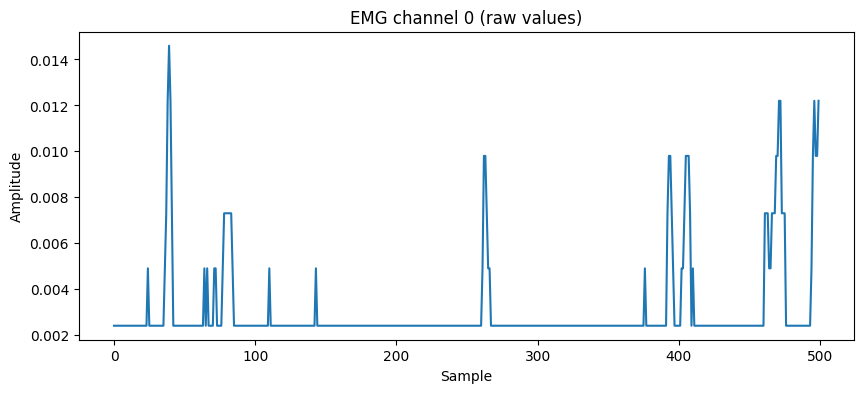

In [11]:
import matplotlib.pyplot as plt

for i in range(1):
    plt.figure(figsize=(10, 4))
    plt.plot(emg[10000:10500, 0])
    plt.title("EMG channel 0 (raw values)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()


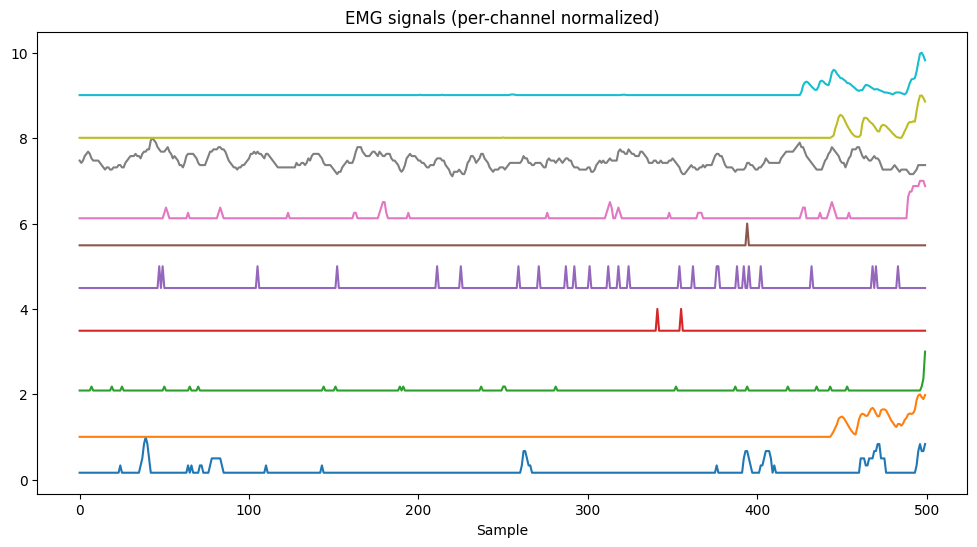

In [12]:
window = emg[10000:10500, :]

# normalize each channel independently
window_norm = window / np.max(np.abs(window), axis=0)

plt.figure(figsize=(12, 6))
for ch in range(window_norm.shape[1]):
    plt.plot(window_norm[:, ch] + ch)

plt.title("EMG signals (per-channel normalized)")
plt.xlabel("Sample")
plt.show()
